## **DEMANDA Y TEMPERATURA:** POR ESTACIONES

#### **1) Importamos libreria útiles:**

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(style="darkgrid")
maxScatter = 3000

#### **2) Cargamos datos:**

- Comprobamos que trabajamos en el directorio correcto y cargamos datos de carpeta "data":

In [13]:
dir = os.getcwd()
DIR = dir
print('Current working directory:', os.getcwd())


# Nos guardamos los datos que queremos en un dataframe usando pandas
dataframe = pd.read_csv('..\data\G02_DATOS_DEM_G1.csv', sep=',', verbose=True)
dataframe['FECHA'] = pd.to_datetime(dataframe['FECHA'], format='%d/%m/%Y')
dataframe

Current working directory: c:\Users\serov\Documents\GitHub\TRABAJO-1-ESTADISTICA-DESCRIPTIVA\notebooks
Tokenization took: 1.00 ms
Type conversion took: 2.22 ms
Parser memory cleanup took: 0.00 ms


,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


- En este notebook queremos estudiar las distintas estaciones, por tanto haremos 4 dataframes (uno por cada estación):

In [14]:
def getMonths(input, m1, m2, m3):
    return input.loc[(input['FECHA'].dt.month==m1) | (input['FECHA'].dt.month==m2) | (input['FECHA'].dt.month==m3)]

dataframe_invierno = getMonths(dataframe, 12, 1, 2)
dataframe_primavera = getMonths(dataframe, 3, 4, 5)
dataframe_verano = getMonths(dataframe, 6, 7, 8)
dataframe_otoño = getMonths(dataframe, 9, 10, 11)

In [15]:
dataframe_invierno.describe()

,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,945.159077,15.243774,6.879974,0.047682,2017.698013,4.915232,15.550993,4.006623
std,125.504644,2.502789,2.720352,0.213234,2.423128,4.975080,8.762016,1.998330
min,567.896404,7.200000,-0.700000,0.000000,2014.000000,1.000000,1.000000,1.000000
25%,861.770000,13.800000,5.000000,0.000000,2016.000000,1.000000,8.000000,2.000000
50%,948.590000,15.200000,7.000000,0.000000,2018.000000,2.000000,16.000000,4.000000
75%,1032.268030,16.700000,8.600000,0.000000,2020.000000,12.000000,23.000000,6.000000
max,1298.008083,23.800000,15.000000,1.000000,2022.000000,12.000000,31.000000,7.000000


In [16]:
dataframe_primavera.describe()

,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.00000,736.000000,736.000000
mean,729.277424,19.325722,11.640681,0.027174,2017.500000,4.00000,15.836957,3.995924
std,129.168866,3.102555,3.254068,0.162701,2.292846,0.82148,8.860248,2.003055
min,460.430000,10.000000,2.600000,0.000000,2014.000000,3.00000,1.000000,1.000000
25%,637.587500,17.100000,9.200000,0.000000,2015.750000,3.00000,8.000000,2.000000
50%,720.150000,19.150000,11.600000,0.000000,2017.500000,4.00000,16.000000,4.000000
75%,822.895000,21.500000,14.200000,0.000000,2019.250000,5.00000,23.250000,6.000000
max,1118.390000,28.900000,19.800000,1.000000,2021.000000,5.00000,31.000000,7.000000


In [17]:
dataframe_verano.describe()

,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
count,736.000000,736.000000,736.000000,736.00000,736.000000,736.000000,736.000000,736.000000
mean,591.638192,28.302688,21.303605,0.01087,2017.500000,7.010870,15.836957,3.997283
std,63.928008,2.426520,2.469902,0.10376,2.292846,0.814756,8.860248,2.001358
min,419.120000,20.300000,11.400000,0.00000,2014.000000,6.000000,1.000000,1.000000
25%,541.150000,26.900000,19.800000,0.00000,2015.750000,6.000000,8.000000,2.000000
50%,599.089031,28.600000,21.800000,0.00000,2017.500000,7.000000,16.000000,4.000000
75%,639.910998,29.900000,23.000000,0.00000,2019.250000,8.000000,23.250000,6.000000
max,727.599379,37.000000,27.300000,1.00000,2021.000000,8.000000,31.000000,7.000000


In [18]:
dataframe_otoño.describe()

,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,715.525815,22.658275,14.821130,0.019231,2017.500000,10.000000,15.670330,4.000000
std,132.743050,4.038582,4.694978,0.137430,2.292863,0.812556,8.764132,2.001375
min,462.310000,9.000000,0.900000,0.000000,2014.000000,9.000000,1.000000,1.000000
25%,622.877500,19.675001,11.475000,0.000000,2015.750000,9.000000,8.000000,2.000000
50%,687.515000,23.000000,15.250000,0.000000,2017.500000,10.000000,16.000000,4.000000
75%,787.248582,25.700000,18.500000,0.000000,2019.250000,11.000000,23.000000,6.000000
max,1102.740000,31.600000,24.500000,1.000000,2021.000000,11.000000,31.000000,7.000000


#### **3) Graficamos:**

- Demandas por año:

<function matplotlib.pyplot.show(close=None, block=None)>

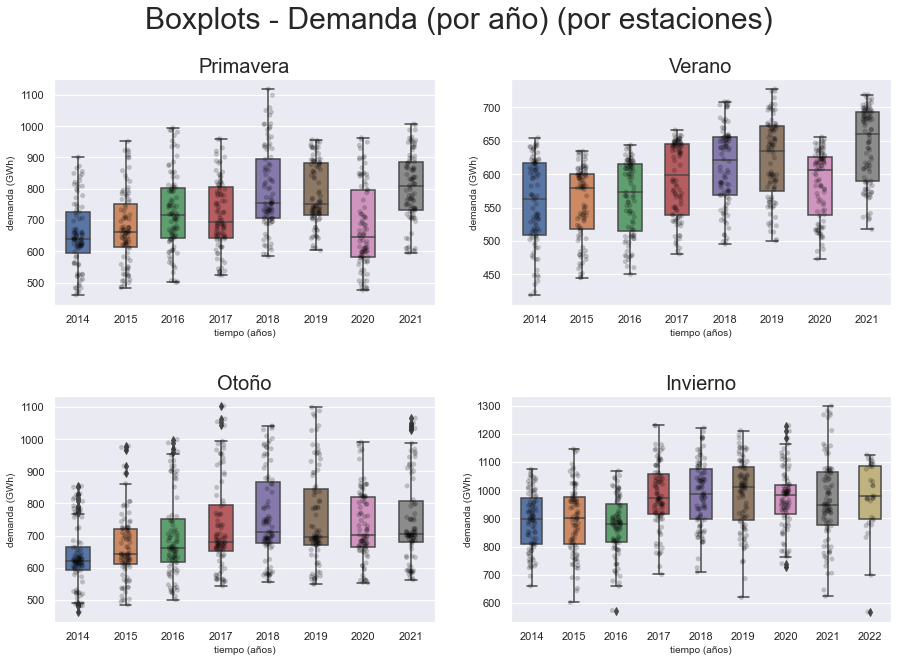

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

# Ajustamos el espaciado
fig.subplots_adjust(wspace = 0.2, hspace = 0.4)

# Primavera
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_primavera, 
                 width=0.5,
                 ax=ax1)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_primavera, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax1)

# Verano
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_verano, 
                 width=0.5,
                 ax=ax2)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_verano, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax2)

# Otoño
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_otoño, 
                 width=0.5,
                 ax=ax3)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_otoño, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax3)

# Invierno
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_invierno, 
                 width=0.5,
                 ax=ax4)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_invierno, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax4)

plt.suptitle('Boxplots - Demanda (por año) (por estaciones)', fontsize = 30)
ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

ax1.set_xlabel("tiempo (años)", fontsize = 10)
ax1.set_ylabel("demanda (GWh)", fontsize = 10)

ax2.set_xlabel("tiempo (años)", fontsize = 10)
ax2.set_ylabel("demanda (GWh)", fontsize = 10)

ax3.set_xlabel("tiempo (años)", fontsize = 10)
ax3.set_ylabel("demanda (GWh)", fontsize = 10)

ax4.set_xlabel("tiempo (años)", fontsize = 10)
ax4.set_ylabel("demanda (GWh)", fontsize = 10)

plt.savefig('../reports/figures/Boxplots - Demanda (por año) (por estaciones).png', bbox_inches='tight')
plt.show

    Nota: En invierno de 2021 toma lugar la nevada "Filomena", la cual acarrea un crecimiento exponencial en la demanda energética.

- Temperaturas máximas por año:

<function matplotlib.pyplot.show(close=None, block=None)>

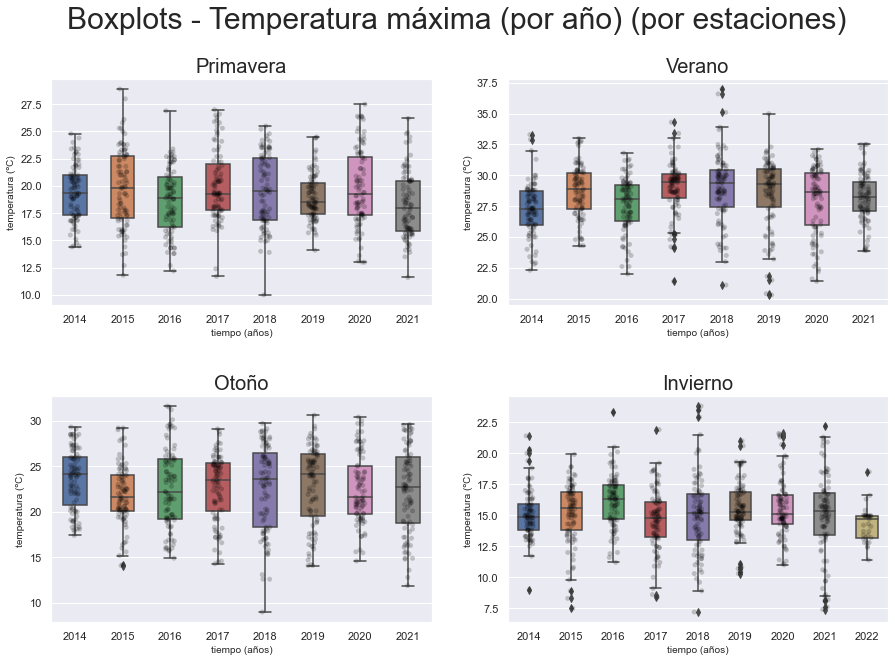

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

# Ajustamos el espaciado
fig.subplots_adjust(wspace = 0.2, hspace = 0.4)

# Primavera
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_primavera, 
                 width=0.5,
                 ax=ax1)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_primavera, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax1)

# Verano
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_verano, 
                 width=0.5,
                 ax=ax2)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_verano, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax2)

# Otoño
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_otoño, 
                 width=0.5,
                 ax=ax3)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_otoño, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax3)

# Invierno
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_invierno, 
                 width=0.5,
                 ax=ax4)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_invierno, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax4)

plt.suptitle('Boxplots - Temperatura máxima (por año) (por estaciones)', fontsize = 30)
ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

ax1.set_xlabel("tiempo (años)", fontsize = 10)
ax1.set_ylabel("temperatura (ºC)", fontsize = 10)

ax2.set_xlabel("tiempo (años)", fontsize = 10)
ax2.set_ylabel("temperatura (ºC)", fontsize = 10)

ax3.set_xlabel("tiempo (años)", fontsize = 10)
ax3.set_ylabel("temperatura (ºC)", fontsize = 10)

ax4.set_xlabel("tiempo (años)", fontsize = 10)
ax4.set_ylabel("temperatura (ºC)", fontsize = 10)

plt.savefig('../reports/figures/Boxplots - Temperatura máxima (por año) (por estaciones).png', bbox_inches='tight')
plt.show

- Temperatura mínima por año:

<function matplotlib.pyplot.show(close=None, block=None)>

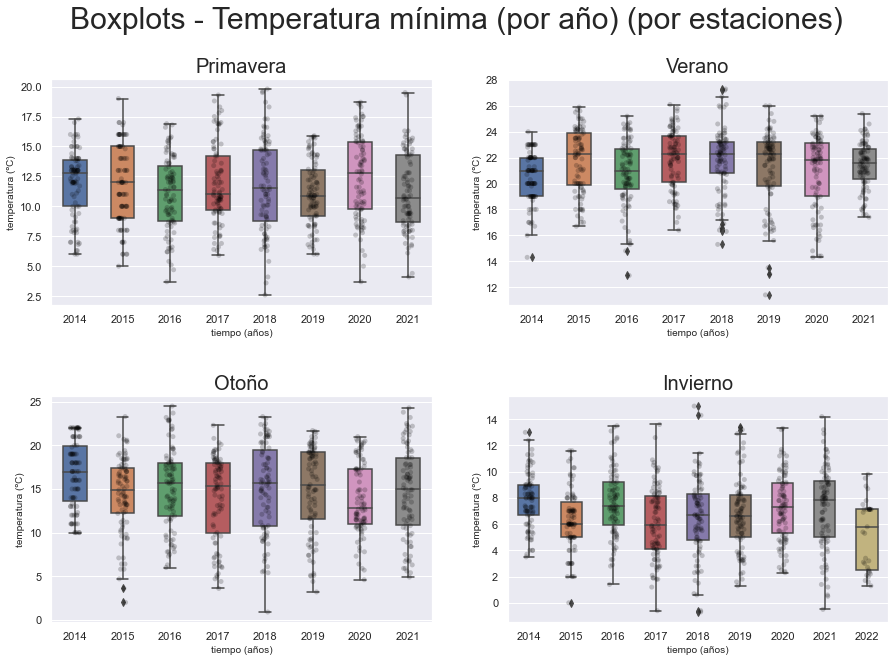

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

# Ajustamos el espaciado
fig.subplots_adjust(wspace = 0.2, hspace = 0.4)

# Primavera
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_primavera, 
                 width=0.5,
                 ax=ax1)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_primavera, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax1)

# Verano
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_verano, 
                 width=0.5,
                 ax=ax2)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_verano, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax2)

# Otoño
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_otoño, 
                 width=0.5,
                 ax=ax3)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_otoño, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax3)

# Invierno
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_invierno, 
                 width=0.5,
                 ax=ax4)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_invierno, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax4)

plt.suptitle('Boxplots - Temperatura mínima (por año) (por estaciones)', fontsize = 30)
ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

ax1.set_xlabel("tiempo (años)", fontsize = 10)
ax1.set_ylabel("temperatura (ºC)", fontsize = 10)

ax2.set_xlabel("tiempo (años)", fontsize = 10)
ax2.set_ylabel("temperatura (ºC)", fontsize = 10)

ax3.set_xlabel("tiempo (años)", fontsize = 10)
ax3.set_ylabel("temperatura (ºC)", fontsize = 10)

ax4.set_xlabel("tiempo (años)", fontsize = 10)
ax4.set_ylabel("temperatura (ºC)", fontsize = 10)

plt.savefig('../reports/figures/Boxplots - Temperatura mínima (por año) (por estaciones).png', bbox_inches='tight')
plt.show

C:\Users\serov\AppData\Local\Temp\ipykernel_24944\3421515391.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im1, cax=cax, orientation='vertical')
C:\Users\serov\AppData\Local\Temp\ipykernel_24944\3421515391.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im2, cax=cax, orientation='vertical')
C:\Users\serov\AppData\Local\Temp\ipykernel_24944\3421515391.py:43: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im3, cax=cax, orientation='vertical')
C:\Users\serov\AppData\Local\Temp\ipykernel_24944\3421515391.py:57: MatplotlibDeprecationWa

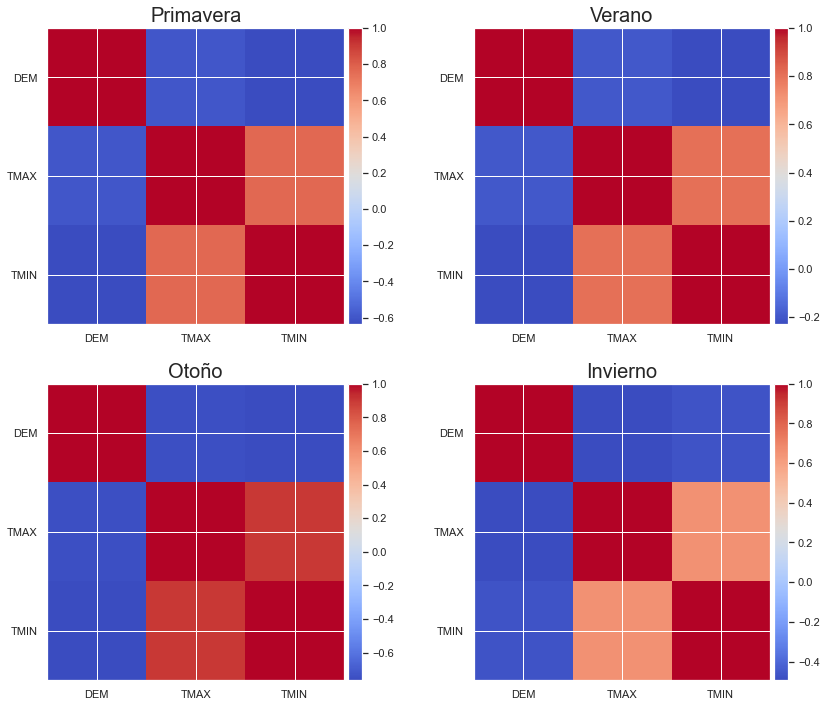

           DEM      TMAX      TMIN
DEM   1.000000 -0.598902 -0.638368
TMAX -0.598902  1.000000  0.766854
TMIN -0.638368  0.766854  1.000000
           DEM      TMAX      TMIN
DEM   1.000000 -0.192587 -0.229939
TMAX -0.192587  1.000000  0.803255
TMIN -0.229939  0.803255  1.000000
           DEM      TMAX      TMIN
DEM   1.000000 -0.747525 -0.765488
TMAX -0.747525  1.000000  0.901080
TMIN -0.765488  0.901080  1.000000
           DEM      TMAX      TMIN
DEM   1.000000 -0.494631 -0.469990
TMAX -0.494631  1.000000  0.652726
TMIN -0.469990  0.652726  1.000000


In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

corr_pri = dataframe_primavera[['DEM', 'TMAX', 'TMIN']].corr()
corr_ver = dataframe_verano[['DEM', 'TMAX', 'TMIN']].corr()
corr_oto = dataframe_otoño[['DEM', 'TMAX', 'TMIN']].corr()
corr_inv = dataframe_invierno[['DEM', 'TMAX', 'TMIN']].corr()

fig = plt.figure(figsize=(14, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(corr_pri, cmap='coolwarm', vmin=-1, vmax=1)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ticks = np.arange(0,len(dataframe_primavera[['DEM', 'TMAX', 'TMIN']].columns),1)
ax1.set_xticks(ticks)
plt.xticks(rotation=90)
ax1.set_yticks(ticks)
ax1.set_xticklabels(dataframe_primavera[['DEM', 'TMAX', 'TMIN']].columns)
ax1.set_yticklabels(dataframe_primavera[['DEM', 'TMAX', 'TMIN']].columns)

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(corr_ver, cmap='coolwarm', vmin=-1, vmax=1)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ticks = np.arange(0,len(dataframe_verano[['DEM', 'TMAX', 'TMIN']].columns),1)
ax2.set_xticks(ticks)
plt.xticks(rotation=90)
ax2.set_yticks(ticks)
ax2.set_xticklabels(dataframe_verano[['DEM', 'TMAX', 'TMIN']].columns)
ax2.set_yticklabels(dataframe_verano[['DEM', 'TMAX', 'TMIN']].columns)

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(corr_oto, cmap='coolwarm', vmin=-1, vmax=1)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

ticks = np.arange(0,len(dataframe_otoño[['DEM', 'TMAX', 'TMIN']].columns),1)
ax3.set_xticks(ticks)
plt.xticks(rotation=90)
ax3.set_yticks(ticks)
ax3.set_xticklabels(dataframe_otoño[['DEM', 'TMAX', 'TMIN']].columns)
ax3.set_yticklabels(dataframe_otoño[['DEM', 'TMAX', 'TMIN']].columns)

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(corr_inv, cmap='coolwarm', vmin=-1, vmax=1)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical');

ticks = np.arange(0,len(dataframe_invierno[['DEM', 'TMAX', 'TMIN']].columns),1)
ax4.set_xticks(ticks)
plt.xticks(rotation=90)
ax4.set_yticks(ticks)
ax4.set_xticklabels(dataframe_invierno[['DEM', 'TMAX', 'TMIN']].columns)
ax4.set_yticklabels(dataframe_invierno[['DEM', 'TMAX', 'TMIN']].columns)

ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

plt.savefig('../reports/figures/Correlación entre variables (por estaciones).png', bbox_inches='tight')
plt.show()

print(corr_pri)
print(corr_ver)
print(corr_oto)
print(corr_inv)